In [1]:
from bs4 import BeautifulSoup
import requests
from collections import defaultdict
from PIL import Image
import pylab as pl
import matplotlib.pyplot as plt


In [2]:
url=r"https://www.washingtonpost.com/"
content=requests.get(url).text

In [3]:
soup=BeautifulSoup(content,"lxml")
divs=soup.find_all("div",class_="relative gray-darkest pb-xs")


In [4]:
print(len(divs))

123


In [5]:
news=defaultdict(list)
limit=20
for i,j in enumerate(divs):
    print(i)
    link=requests.get(j.find("a").get('href')).text
    try:
        articleimg=BeautifulSoup(r"{}".format(link),"lxml").find("img")["srcset"].split("&")[0]
        response = requests.get(articleimg,stream=True)
        img = Image.open(response.raw)
    except:
        img=0
    news[i].append((j.find("span").text,img))
    if i==20: # to stop the loop after only 20 images
        break
    #img=IPython.display.Image(articleimg, width = 250)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


C:\Users\omara\AppData\Local\Temp/ipykernel_1832/895379098.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure();


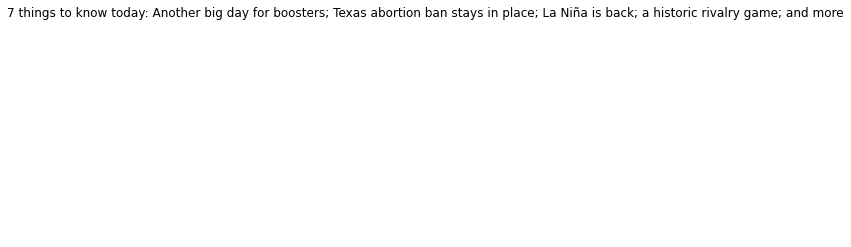

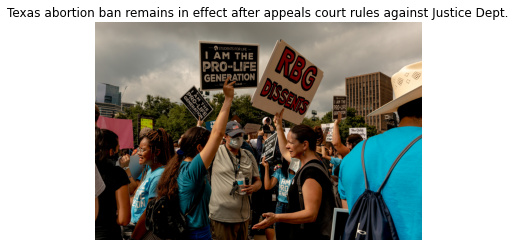

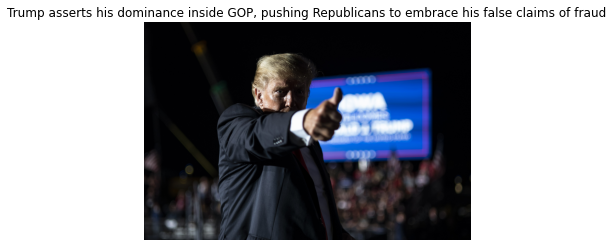

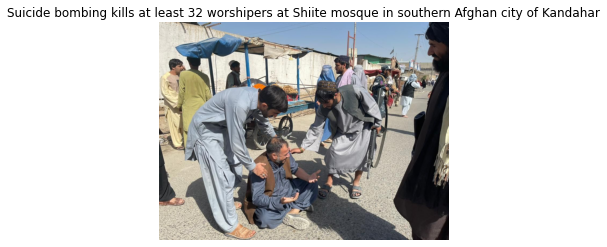

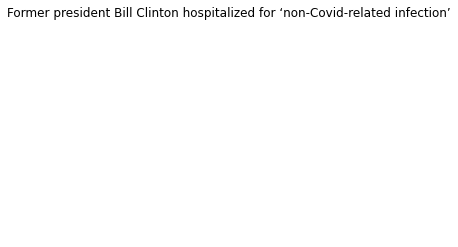

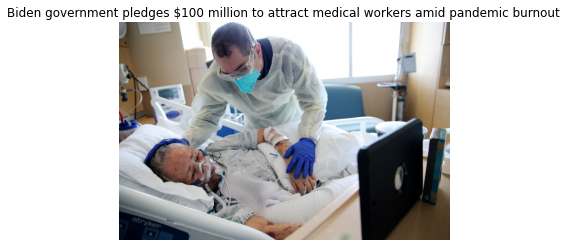

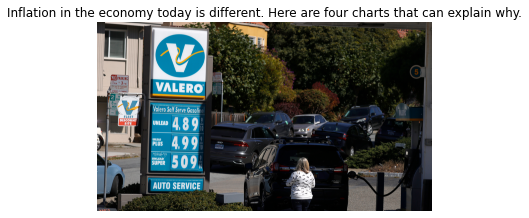

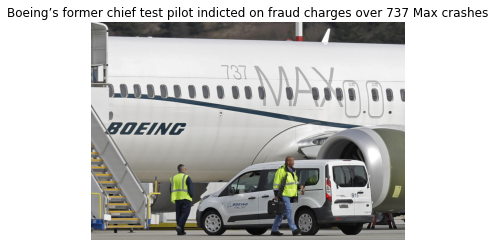

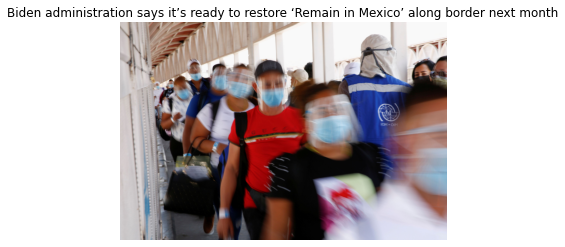

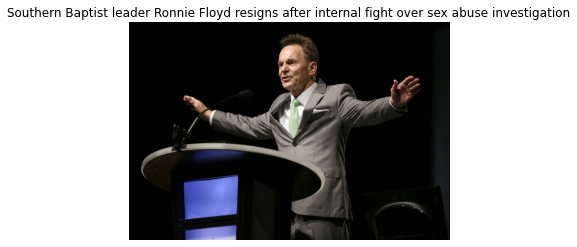

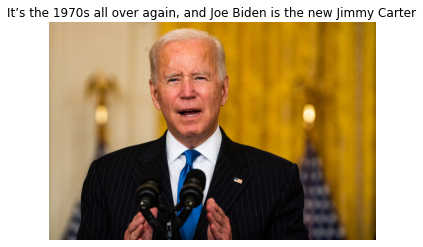

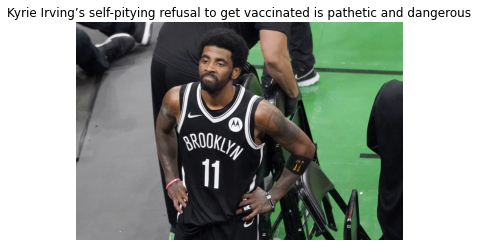

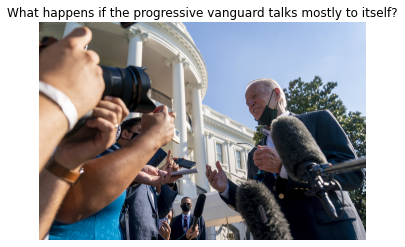

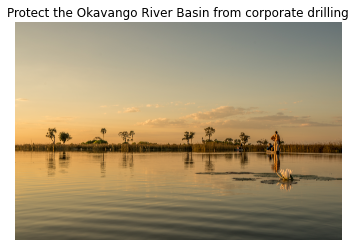

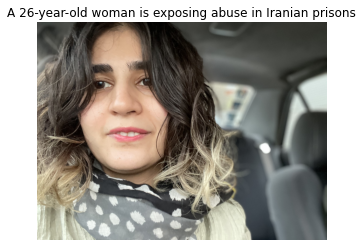

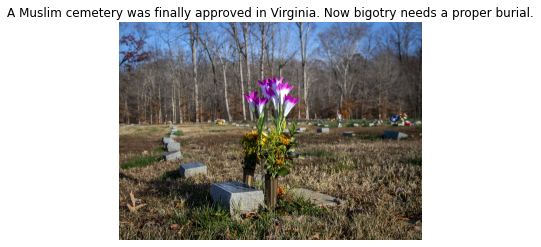

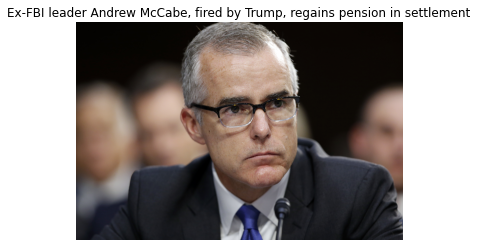

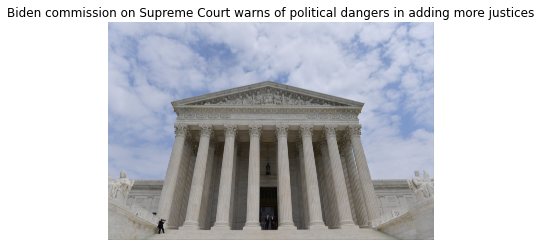

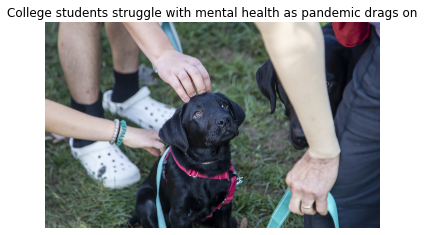

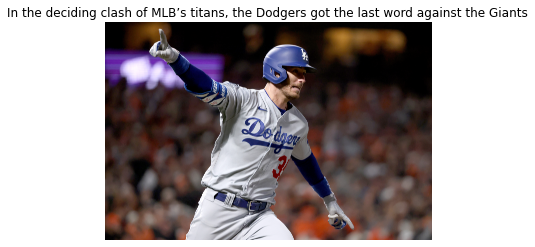

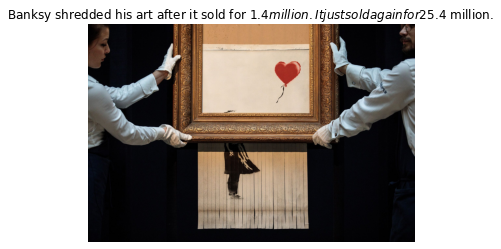

In [7]:
for i in news:
    plt.figure();
    pl.axis("off")
    pl.title(news[i][0][0]) 
    if news[i][0][1]:
        pl.imshow(news[i][0][1])
    else:
        pass
        
    
#texts,image=zip(*news.values())